In [ ]:
def sse(yp,y, I):
    errorlist = np.zeros((len(y),1))
    
    for i in range (I):
        error=(1/2)*((yp[i]-y[i])**2)
        errorlist[i]=error
        
    return np.sum(errorlist)

In [ ]:
'''QUESTION 1'''

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import random as rd

x=np.zeros((40,10))
xtrain=np.zeros((30,10))
xtest=np.zeros((10,10))
y=np.zeros((40,1))

#40 sequences of 10 binary numbers
for i in range (40):
    for j in range (10):
        x[i,j]=np.random.randint(0,2) #generate 0 or 1 randomly
        temp=np.sum(x[i,:])
        y[i]=temp #y = sum of its element
        
y=y.reshape(40,1)
xtrain, xtest = np.split(x, [int(.75*len(x))])
ytrain, ytest = np.split(y, [int(.75*len(y))])

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)

(30, 10)
(10, 10)
(30, 1)


In [ ]:
'''QUESTION 2.1 : BACK PROPAGATION'''

T=10
Iteramax=1000
alpha=0.00001

#Back propagation
vfBACK = rd.random()
vxBACK = rd.random()

#vxBACK=5
#vfBACK=5

print('vxBACK before',vxBACK)
print('vfBACK before', vfBACK)

ypredict=np.zeros((30,1))
f=np.zeros((30,10))

ErrorB =[]
dEvx=0
dEvf=0
for itera in range(Iteramax):
    
    #FWP
    for i in range (30):
        for t in range(1,T):
            val1=f[i,t-1]*vfBACK
            val2=vxBACK*xtrain[i,t]
            f[i,t]=val1+val2
            #f[i,t]=f[i,t-1]*vf[i]+xtrain[i,t]*vx[i]
        ypredict[i]=f[i,t]
    ErrorB.append(sse(ypredict,ytrain, 30))
    
    #BACK PROPAGATION    
    dEvx=0
    dEvf=0
    for t in range (1,T):
        power1=(vfBACK**(T-t))
        dEvx += ((ypredict-(ytrain)).T.dot(xtrain[:,t]))*power1
    vxBACK = vxBACK-alpha*dEvx
    for t in range (1,T):
        power2=(vfBACK**(T-t))
        dEvf += ((ypredict-(ytrain)).T.dot(f[:,t-1]))*power2
    vfBACK = vfBACK-alpha*dEvf
    
print('vxBACK after', vxBACK)
print('vfBACK after',vfBACK)

print('\nIF vx & vf = 5, => explosition!! => error')
#print('ypredict' ,ypredict)
#print('ytrain', ytrain)

vxBACK before 0.8587945091818544
vfBACK before 0.5330693774104035
vxBACK after [1.02649236]
vfBACK after [1.01636527]

IF vx & vf = 5, => explosition!! => error


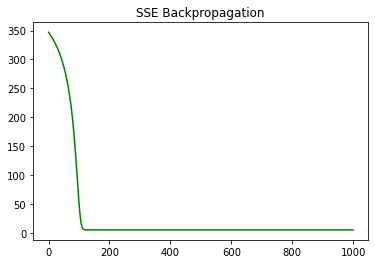

ypredict BACK PROPAGATION [[3.1822232  6.55824952 5.51786327 4.40227468 8.77150328 5.44784303
  9.86685876 7.58534976 2.19186535 3.35922905 7.6376596  5.48399387
  7.6376596  7.62208248 4.40336364 2.21038076 5.41167314 7.76263955
  4.35015941 7.60267268 5.39144004 1.02649916 3.30800816 4.42019869
  1.11327949 8.78913871 4.42306201 6.66671155 5.44669785 6.68547372]]
ytrain BACK PROPAGATION [[3. 7. 5. 5. 9. 6. 9. 7. 3. 4. 8. 5. 7. 8. 4. 3. 5. 7. 4. 7. 6. 2. 4. 5.
  2. 9. 4. 7. 6. 7.]]


In [ ]:
'''QUESTION 3.1 : COMPARING BACKPROP RESULTS'''

plt.plot(ErrorB, c='g', label='SSE', linestyle='-')
plt.title("SSE Backpropagation")
plt.show()

print('ypredict BACK PROPAGATION' ,ypredict.T)
print('ytrain BACK PROPAGATION', ytrain.T)

In [ ]:
'''QUESTION 2.2 RESILIENT PROPAGATION'''

T=10
Iteramax=1000
alpha=0.00001

npp=1.2
nn=0.5
dx=0.001
df=0.001
ErrorR =[]
vfRES = rd.random()
vxRES = rd.random()

#vfRES=5
#vxRES=5

print('vxRES before',vxRES)
print('vfRES before',vfRES)

dEvx=0
dEvf=0
for itera in range(Iteramax):
    
    for i in range (30):
        for t in range(1,T):
            val1=f[i,t-1]*vfRES
            val2=vxRES*xtrain[i,t]
            f[i,t]=val1+val2
            #f[i,t]=f[i,t-1]*vf[i]+xtrain[i,t]*vx[i]
        ypredict[i]=f[i,t]
    ErrorR.append(sse(ypredict,ytrain, 30))
    
    tempX=dEvx
    tempF=dEvf
    
    dEvx=0
    dEvf=0
    for t in range (1,T):
        power1=(vfRES**(T-t))
        dEvx += ((ypredict-(ytrain)).T.dot(xtrain[:,t]))*power1
    
    for t in range (1,T):
        power2=(vfRES**(T-t))
        dEvf += ((ypredict-(ytrain)).T.dot(f[:,t-1]))*power2
    
    
    #RESILIENT
    if np.sign(dEvx)==np.sign(tempX):
        n=npp
    else:
        n=nn
    
    dx=dx*n
    vxRES=vxRES-np.sign(dEvx)*dx
    
    if np.sign(dEvf)==np.sign(tempF):
        n=npp
    else:
        n=nn
    df=df*n
    vfRES=vfRES-np.sign(dEvf)*df
    
print('vxRES after',vxRES)
print('vfRES after',vfRES)

vxRES before 0.48315787862535353
vfRES before 0.3267727271355083
vxRES after [0.99265935]
vfRES after [1.02457905]


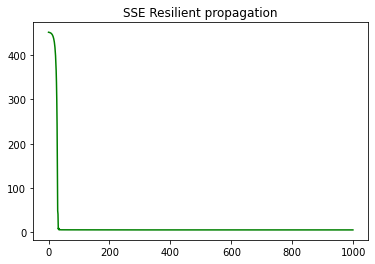

ypredict RESILIENT [[3.12863039 6.54558788 5.53505767 4.40910537 8.77061132 5.43120475
  9.8645182  7.53962432 2.19039361 3.39256142 7.61698726 5.48566596
  7.61698726 7.59539111 4.41146666 2.21861548 5.37667935 7.80418476
  4.33207246 7.56513798 5.34463394 0.9926659  3.31755977 4.43598957
  1.12079109 8.79685065 4.44236465 6.70900361 5.42865547 6.73773108]]
ytrain RESILIENT [[3. 7. 5. 5. 9. 6. 9. 7. 3. 4. 8. 5. 7. 8. 4. 3. 5. 7. 4. 7. 6. 2. 4. 5.
  2. 9. 4. 7. 6. 7.]]


In [ ]:
'''QUESTION 3.2 COMPARING RESULTS RESILIENT'''

plt.plot(ErrorR, c='g', label='SSE', linestyle='-')
plt.title("SSE Resilient propagation")
plt.show()

print('ypredict RESILIENT' ,ypredict.T)
print('ytrain RESILIENT', ytrain.T)

In [ ]:
'''QUESTION 2.3 GRADIENT CLIPPING'''
T=10
Iteramax=2000
alpha=0.001
n=10


vfGRAD = rd.random()
vxGRAD = rd.random()

#vxGRAD=5
#vxGRAD=5

print('vxGRAD before',vxGRAD)
print('vfGRAD before',vfGRAD)

ypredict=np.zeros((30,1))
f=np.zeros((30,10))

Error =[]

dEv=np.zeros((2,1))
for itera in range(Iteramax):
    
    #FWP
    for i in range (30):
        for t in range(1,T):
            val1=f[i,t-1]*vfGRAD
            val2=vxGRAD*xtrain[i,t]
            f[i,t]=val1+val2
            #f[i,t]=f[i,t-1]*vf[i]+xtrain[i,t]*vx[i]
        ypredict[i]=f[i,t]
    Error.append(sse(ypredict,ytrain, 30))
    
    #BACK PROP  
    dEvx=0
    dEvf=0
    for t in range (1,T):
        power1=(vfGRAD**(T-t))
        dEvx += ((ypredict-(ytrain)).T.dot(xtrain[:,t]))*power1
    
    for t in range (1,T):
        power2=(vfGRAD**(T-t))
        dEvf += ((ypredict-(ytrain)).T.dot(f[:,t-1]))*power2
    
    #GRADIENT CLIPPING
    dEv[0]=dEvx
    dEv[1]=dEvf
    
    module=np.linalg.norm(dEv)
    
    if module > n:
        dEv = (n*dEv)/module
        vxGRAD = vxGRAD - alpha*dEv[0]
        vfGRAD = vfGRAD - alpha*dEv[1]
        dEvx=dEv[0]
        dEvf=dEv[1]
    else:
        vfGRAD = vfGRAD - alpha * dEvf
        vxGRAD = vxGRAD - alpha * dEvx
    
print('vxGRAD after', vxGRAD)
print('vfGRAD after',vfGRAD)

#print(ypredict)
#print(ytrain)

vxGRAD before 0.4887624490249105
vfGRAD before 0.6603622524607112
vxGRAD after [0.99338807]
vfGRAD after [1.02897501]


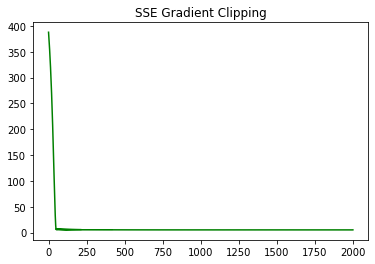

ypredict GRADIENT CLIPPING [[3.09012942 6.40243721 5.39629025 4.30296614 8.56847824 5.3161061
  9.63807669 7.39424229 2.14075528 3.29321409 7.45408869 5.35773496
  7.45408869 7.43665778 4.30442069 2.16216538 5.27444692 7.59770916
  4.24335999 7.41403337 5.25072125 0.99098784 3.23482225 4.32357446
  1.09020676 8.588697   4.32743466 6.52733895 5.3145623  6.54907233]]
ytrain GRADIENT CLIPPING [[3. 7. 5. 5. 9. 6. 9. 7. 3. 4. 8. 5. 7. 8. 4. 3. 5. 7. 4. 7. 6. 2. 4. 5.
  2. 9. 4. 7. 6. 7.]]


In [ ]:
'''QUESTION 3.3 COMPARING GRADIENT CLIPPING RESULTS'''

plt.plot(Error, c='g', label='SSE', linestyle='-')
plt.title("SSE Gradient Clipping")
plt.show()

print('ypredict GRADIENT CLIPPING' ,ypredict.T)
print('ytrain GRADIENT CLIPPING', ytrain.T)

In [ ]:
'''QUESTION 4'''

print('For question 4, \n\nRemove comment on "vx & vf = 5" and add comment on "vx & vf = random"')
print('\nPlease remove comment on vx & vf at : \n\n\tLine 11/12 at question 2.1\n\n\tLine 15/16 at question 2.2\n\n\tLine 11/12 at question 2.3')

For question 4, 

Remove comment on "vx & vf = 5" and add comment on "vx & vf = random"

Please remove comment on vx & vf at : 

	Line 11/12 at question 2.1

	Line 15/16 at question 2.2

	Line 11/12 at question 2.3


In [ ]:
'''QUESTION 5'''

#BACK PROP
ErrorBACK=[]
ypredictBACK=np.zeros((10,1))
for i in range (10):
    for t in range(1,T):
        val1=f[i,t-1]*vfBACK
        val2=vxBACK*xtest[i,t]
        f[i,t]=val1+val2
    ypredictBACK[i]=f[i,t]
ErrorBACK.append(sse(ypredictBACK,ytest, 10))
  
#RESILIENT
ErrorRES=[]
ypredictRES=np.zeros((10,1))
for i in range (10):
    for t in range(1,T):
        val1=f[i,t-1]*vfRES
        val2=vxRES*xtest[i,t]
        f[i,t]=val1+val2
    ypredictRES[i]=f[i,t]
ErrorRES.append(sse(ypredictRES,ytest, 10))
    
#GRADIENT CLIPPING
ErrorGRAD=[]
ypredictGRAD=np.zeros((10,1))
for i in range (10):
    for t in range(1,T):
        val1=f[i,t-1]*vfGRAD
        val2=vxGRAD*xtest[i,t]
        f[i,t]=val1+val2
    ypredictGRAD[i]=f[i,t]
ErrorGRAD.append(sse(ypredictGRAD,ytest, 10))

In [ ]:
def greet_me(**kwargs):
    for key, value in kwargs.items():
        print("{0} = {1}".format(key, value))

greet_me(name="yasoob",names="yasoob")


name = yasoob
names = yasoob


In [ ]:
print('ypredictBACK\n',ypredictBACK.T)
print('\nypredictRES\n', ypredictRES.T)
print('\nypredictGRAD\n',ypredictGRAD.T)
print('\nytest\n',ytest.T)

ypredictBACK
 [[3.13014848 4.45693834 5.4834307  2.31885532 4.43808988 7.58473948
  5.5363468  6.52151066 3.32366345 4.47542753]]

ypredictRES
 [[3.0517736  4.49178842 5.48444777 2.3820631  4.4627754  7.53827277
  5.5631901  6.48983999 3.33942694 4.51991969]]

ypredictGRAD
 [[3.06734851 4.59572127 5.58910933 2.46166779 4.56041135 7.65558564
  5.68321081 6.59483116 3.41093618 4.62972971]]

ytest
 [[4. 4. 5. 2. 5. 8. 6. 6. 3. 4.]]
